In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

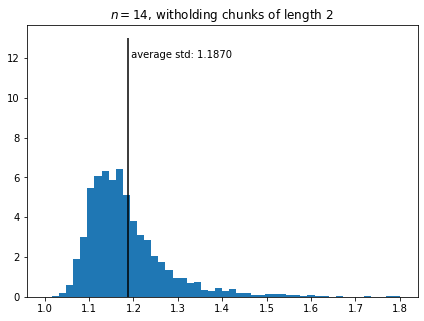

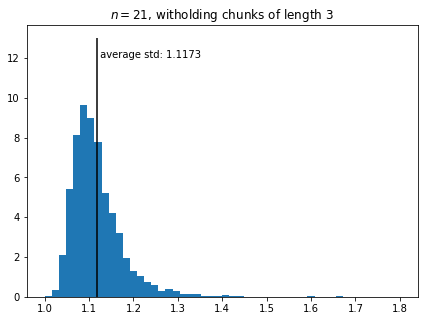

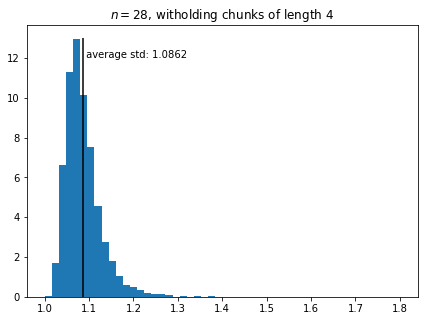

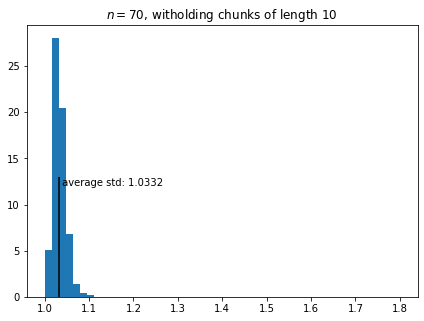

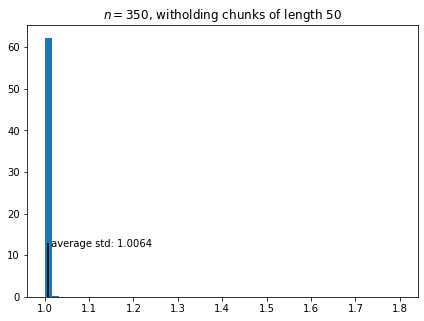

In [33]:
scaling = 2.5
n_chunk = 7 # ~number of years
chunk_sizes = [2,3,4,10,50] # ~number of independent samples inside year

bs_size = int(5e3)

for chunk_size in chunk_sizes:
    
    # total lentgh of synthetic time series:
    ts_length = n_chunk*chunk_size

    cvstdzd_std = []
    for ii in range(bs_size):
        data = scaling*np.random.randn(ts_length)
        # data_std = data.std(ddof=1)

        if bs_size == 1:
            plt.plot(data,'C0')
            plt.hlines(data.mean(),0,ts_length,ls='dashed',color='C0')
            plt.grid()

        # std_est = []
        data_stdzd = []
        for chunk_n in range(n_chunk):
            start_chunk = chunk_size*chunk_n
            end_chunk = start_chunk + chunk_size
            val_slice = slice(start_chunk,end_chunk)

            CV_sample = np.delete(data,val_slice)
            CV_val = data[val_slice]

            mean_est_sample = CV_sample.mean()
            std_est_sample = CV_sample.std(ddof=1)

            # std_est.append(std_est_sample)
            
            data_stdzd.extend((CV_val-mean_est_sample)/std_est_sample)

        if bs_size == 1:
            plt.plot(data_stdzd,'C1')
            plt.hlines(np.array(data_stdzd).mean(),0,ts_length,ls='dashed',color='C1')
            plt.text(0,4,'correlation: {:1.3f}'.format(pearsonr(data,data_stdzd)[0]))

        cvstdzd_std.append(np.array(data_stdzd).std(ddof=1))

    cvstdzd_std = np.array(cvstdzd_std)
    
    f,ax = plt.subplots(figsize=(7,5))
    ax.hist(cvstdzd_std,50,density=True,color='C0',range = (1,1.8))
    ax.vlines(cvstdzd_std.mean(),0,13,color='k')
    ax.text(cvstdzd_std.mean(),12,' average std: {:1.4f}'.format(cvstdzd_std.mean()))
    ax.set_title(r'$n = {0:d}$, witholding chunks of length {1:d}'.format(ts_length,chunk_size))

    f.savefig()